## Abstract
### I explored a dataset with information on thousands of wines. I used a supervised classifcation model for this project, in order to sort the wines into two categories: red or white. This involved me importing the data, performing an analysis, then cleaning, scaling, and modeling the data.

## Intro
### I used a dataset from Kaggle to do this project. I was interested in this because, I personally, am not a huge fan of wine. In a blind taste test I probably would not be able to tell white from red, so I was curious to see if this model could figure out what I cannot using the data it is given! 

## Research Question
### Given the data on each wine can the model determine if the wine is white or red?

## Import Data

In [1]:
#import pandas

import pandas as pd

In [2]:
#Get data set and display it

wine = pd.read_csv(r'C:\Users\Olivia\Desktop\DATA_601\data\wine_dataset.csv')
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
#Amount of red vs. white wine

wine.loc[:, 'style'].value_counts()

white    4898
red      1599
Name: style, dtype: int64

In [4]:
#Dummy Model Accuracy Rate 

4898/(1599 + 4898)

0.7538864091118977

In [5]:
print("The ratio of White to Red wine is:", 4898/(1599 + 4898))

The ratio of White to Red wine is: 0.7538864091118977


In [6]:
#Set y equal to White or Red

y = wine.loc[:, 'style']

In [7]:
#Display Y

y

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, Length: 6497, dtype: object

In [8]:
#Set X to all columns except Style

X = wine.loc[:, wine.columns != 'style']

In [9]:
#Display x

X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
#Instantiate

le = LabelEncoder()

In [12]:
#Fit encoder to y

le.fit(y)

LabelEncoder()

In [13]:
#Transform

le.transform(y)

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
#Red is 0, White is 1

le.classes_

array(['red', 'white'], dtype=object)

## Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt

In [16]:
# Display the count, mean, standard deviation, min and max values, as well as the percentiles of the data

wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Text(0.5, 1.0, 'Distribution of Red vs. White wine')

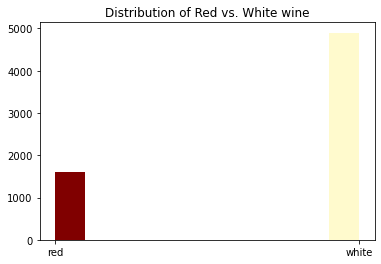

In [17]:
#Display distribution of red and white wine

N, bins, patches = plt.hist(y)
for i in range(0,5):
    patches[i].set_facecolor('Maroon')
for i in range(5,10):    
    patches[i].set_facecolor('Lemonchiffon')
plt.title('Distribution of Red vs. White wine')

#### Checking for Outliers

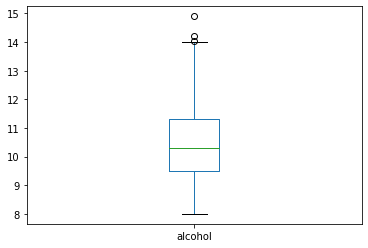

In [18]:
#Check for outliers in Alcohol

wine.alcohol.plot(kind = 'box')

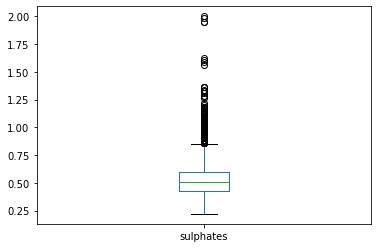

In [19]:
#Check for outliers in Sulphates

wine.sulphates.plot(kind = 'box')

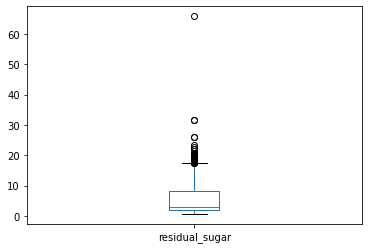

In [20]:
#Check for outliers in Residual Sugar

wine.residual_sugar.plot(kind = 'box')

## Data Cleaning / Prep

In [21]:
#Check for null variables in X

X.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25, stratify = y )

In [24]:
import numpy as np

In [25]:
np.unique(y_train, return_counts = True)

(array(['red', 'white'], dtype=object), array([1279, 3918], dtype=int64))

In [26]:
3918/(3918+1279)

0.7538964787377334

In [27]:
np.unique(y_test, return_counts = True)

(array(['red', 'white'], dtype=object), array([320, 980], dtype=int64))

In [28]:
980/(980+320)

0.7538461538461538

## Scale Data

In [29]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [30]:
std_scaler.fit(X_train) 
X_train_s = std_scaler.transform(X_train) 
X_test_s = std_scaler.transform(X_test)

In [31]:
X_train_s

array([[-0.47886362,  0.35472346,  0.00866954, ..., -0.34339523,
         1.85348123,  1.37164116],
       [-0.01443249, -0.24333906, -0.12827757, ..., -0.27473997,
        -1.17040235,  0.21611853],
       [-1.48513107, -1.0806266 ,  0.48798442, ...,  0.41181271,
         0.08954914,  0.21611853],
       ...,
       [-0.16924286,  2.62736106, -1.63469576, ..., -0.4120505 ,
        -0.41443146, -0.9394041 ],
       [ 1.06924015,  1.25181725,  0.2140902 , ...,  0.68643378,
         0.42553621, -3.25044936],
       [-0.40145843, -0.24333906,  1.17271996, ..., -0.54936104,
        -0.49842822,  0.21611853]])

## Feature Engineering

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly_feats = PolynomialFeatures(degree= 2, interaction_only= True)

In [34]:
poly_feats.fit(X_train_s)

PolynomialFeatures(interaction_only=True)

In [35]:
poly_trained_s = poly_feats.transform(X_train_s)

In [36]:
poly_trained_s.shape

(5197, 79)

In [37]:
poly_test_s = poly_feats.transform(X_test_s)

In [38]:
poly_test_s.shape

(1300, 79)

## Data Modeling

In [39]:
#Import logistic regression

from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression(penalty = 'none')

In [41]:
#Fit model

lr.fit(X_train_s, y_train)

LogisticRegression(penalty='none')

In [42]:
y_prediction = lr.predict(X_train_s)

In [43]:
#Setting Score

score = lr.score(X_train_s, y_train)

In [44]:
#Accuracy

score

0.9953819511256494

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
#Set up confusion matrix

confuse = confusion_matrix(y_train, y_prediction)
confuse

array([[1263,   16],
       [   8, 3910]], dtype=int64)

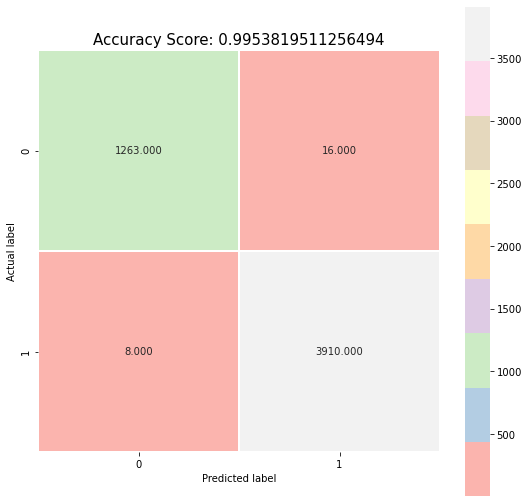

In [47]:
#Display confusion matrix

import utils
utils.plot_confusion_matrix(confuse,score)

In [48]:
#Test data accuracy

lr.score(X_test_s, y_test)

0.9969230769230769

## Model Evaluation & Selection

In [49]:
#Validation
from sklearn.model_selection import cross_validate

In [50]:
lr = LogisticRegression(penalty = 'none')

In [51]:
cross_five = cross_validate(estimator= lr, 
                             X = X_train_s,
                             y = y_train,
                             cv = 5,
                             n_jobs= -1, 
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished


In [52]:
cross_five['test_score']

array([0.99615385, 0.99615385, 0.99037536, 0.99615014, 0.99133782])

In [53]:
validation_mean = cross_five['test_score'].mean()
validation_std = cross_five['test_score'].std()

In [54]:
#Print and store results

print('5 fold cross validation results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

5 fold cross validation results (Accuracy) 0.994 =/- 0.003


## Conclusion
### The model works well and perform with a high accuracy rate. In conclusion, this algorithms knows its wine much better than I do!